In [1]:
import os
os.chdir("..")
!pwd
!pyenv version
%load_ext autoreload
%autoreload 2

/Users/loicmorel/code/projetcs/crypto_assistant
crypto_assistant (set by PYENV_VERSION environment variable)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from datetime import datetime

In [4]:
from app.config import Config
from app.exchanges.binance import Binance
from app.data_mgt.datamgt import collect_historical_data
from app.data_mgt.gcpmgt import Gcp

# Config collection

In [4]:
## collect config
config = Config()
print('settings', config.settings)
print('project', config.project)

settings {'rounding': 8, 'input-mode': 'guided', 'output-mode': 'backtesting', 'window-period': [{'start_date': '2022-01-01_00:00'}, {'end_date': '2022-01-02_00:00'}]}
project {'project_name': 'cryptoassistant', 'project_version': 'v1.0', 'project_id': 'le-wagon-bootcamp-348503', 'region': 'asia-east2', 'job_name': 'cryptoassistant_training_pipeline', 'bucket_name': 'cryptoassistant', 'bucket_training_folder': 'trainings', 'bucket_models_folder': 'models', 'bucket_data_folder': 'data', 'mlflow_uri': 'https://mlflow.lewagon.ai/', 'mlflow_experiment_name': '[CN][850][Crypto Assistant] modelisation - v1'}


# Data collection - OHLCV from exchange API

In [5]:
# connect to exchange
binance = Binance(config)
print('binance exchange connection status:', binance.get_status())

binance exchange connection status: success


In [7]:
# connect to bucket
gcp = Gcp(config)

In [8]:
## collect historical data for LeWagon project and create files in raw_data dir.
assets_list = [
#     ['BTC', '15m', '1h', '1d'],
#     ['ETH', '15m', '1h', '1d'],
#     ['SOL', '15m', '1h', '1d'],
#     ['AAVE', '15m', '1h', '1d'],
    ['DOT', '15m', '1h', '1d']
#     ['NEAR', '15m', '1h', '1d'],
#     ['FTM', '15m', '1h', '1d'],
#     ['VITE', '15m', '1h', '1d']
]
collect_historical_data(binance, gcp, assets_list, '5_years_ago', 'now')

# get historical data => DOTUSDT 15m form 5_years_ago to now
saving klines to: raw_data/ohlcv_DOTUSDT_15m_from_1597791600000_to_1651590000000.csv
=> ✅ raw_data/ohlcv_DOTUSDT_15m_from_1597791600000_to_1651590000000.csv uploaded successfully to bucket cryptoassistant inside data
deleting model localy: raw_data/ohlcv_DOTUSDT_15m_from_1597791600000_to_1651590000000.csv
# get historical data => DOTUSDT 1h form 5_years_ago to now
saving klines to: raw_data/ohlcv_DOTUSDT_1h_from_1597791600000_to_1651590000000.csv
=> ✅ raw_data/ohlcv_DOTUSDT_1h_from_1597791600000_to_1651590000000.csv uploaded successfully to bucket cryptoassistant inside data
deleting model localy: raw_data/ohlcv_DOTUSDT_1h_from_1597791600000_to_1651590000000.csv
# get historical data => DOTUSDT 1d form 5_years_ago to now
saving klines to: raw_data/ohlcv_DOTUSDT_1d_from_1597708800000_to_1651536000000.csv
=> ✅ raw_data/ohlcv_DOTUSDT_1d_from_1597708800000_to_1651536000000.csv uploaded successfully to bucket cryptoassistant insid

#  Data access - OHLCV from google bucket

In [5]:
!make get_all_data

Uploading ohlcv_BTCUSDT_15m_from_1502942400000_to_1651507200000.csv...
=> ✅ ohlcv_BTCUSDT_15m_from_1502942400000_to_1651507200000.csv download successfully from bucket cryptoassistant inside data


In [10]:
from app.data_mgt.datamgt import ohlcv_from_csv_to_df
file = 'data/ohlcv_BTCUSDT_15m_from_1502942400000_to_1651507200000.csv'
data = ohlcv_from_csv_to_df(file)
data

,o_ts,Open,High,Low,Close,Volume,c_ts,o_date
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061,2017-08-17 04:14:59.999000064,17395.166667
1,2017-08-17 04:15:00,4261.48,4270.41,4261.32,4261.45,9.119865,2017-08-17 04:29:59.999000064,17395.177083
2,2017-08-17 04:30:00,4280.00,4310.07,4267.99,4310.07,21.923552,2017-08-17 04:44:59.999000064,17395.187500
3,2017-08-17 04:45:00,4310.07,4313.62,4291.37,4308.83,13.948531,2017-08-17 04:59:59.999000064,17395.197917
4,2017-08-17 05:00:00,4308.83,4328.69,4304.31,4304.31,5.101153,2017-08-17 05:14:59.999000064,17395.208333
...,...,...,...,...,...,...,...,...
164511,2022-05-02 15:00:00,38840.00,38901.37,38700.06,38867.85,660.791880,2022-05-02 15:14:59.999000064,19114.625000
164512,2022-05-02 15:15:00,38867.85,38892.35,38699.07,38756.02,711.673550,2022-05-02 15:29:59.999000064,19114.635417
164513,2022-05-02 15:30:00,38756.03,38810.02,38612.70,38653.79,634.692010,2022-05-02 15:44:59.999000064,19114.645833
164514,2022-05-02 15:45:00,38653.79,38721.89,38605.71,38696.05,513.824790,2022-05-02 15:59:59.999000064,19114.656250


In [7]:
data.dtypes

o_ts      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
c_ts      datetime64[ns]
o_date           float64
dtype: object

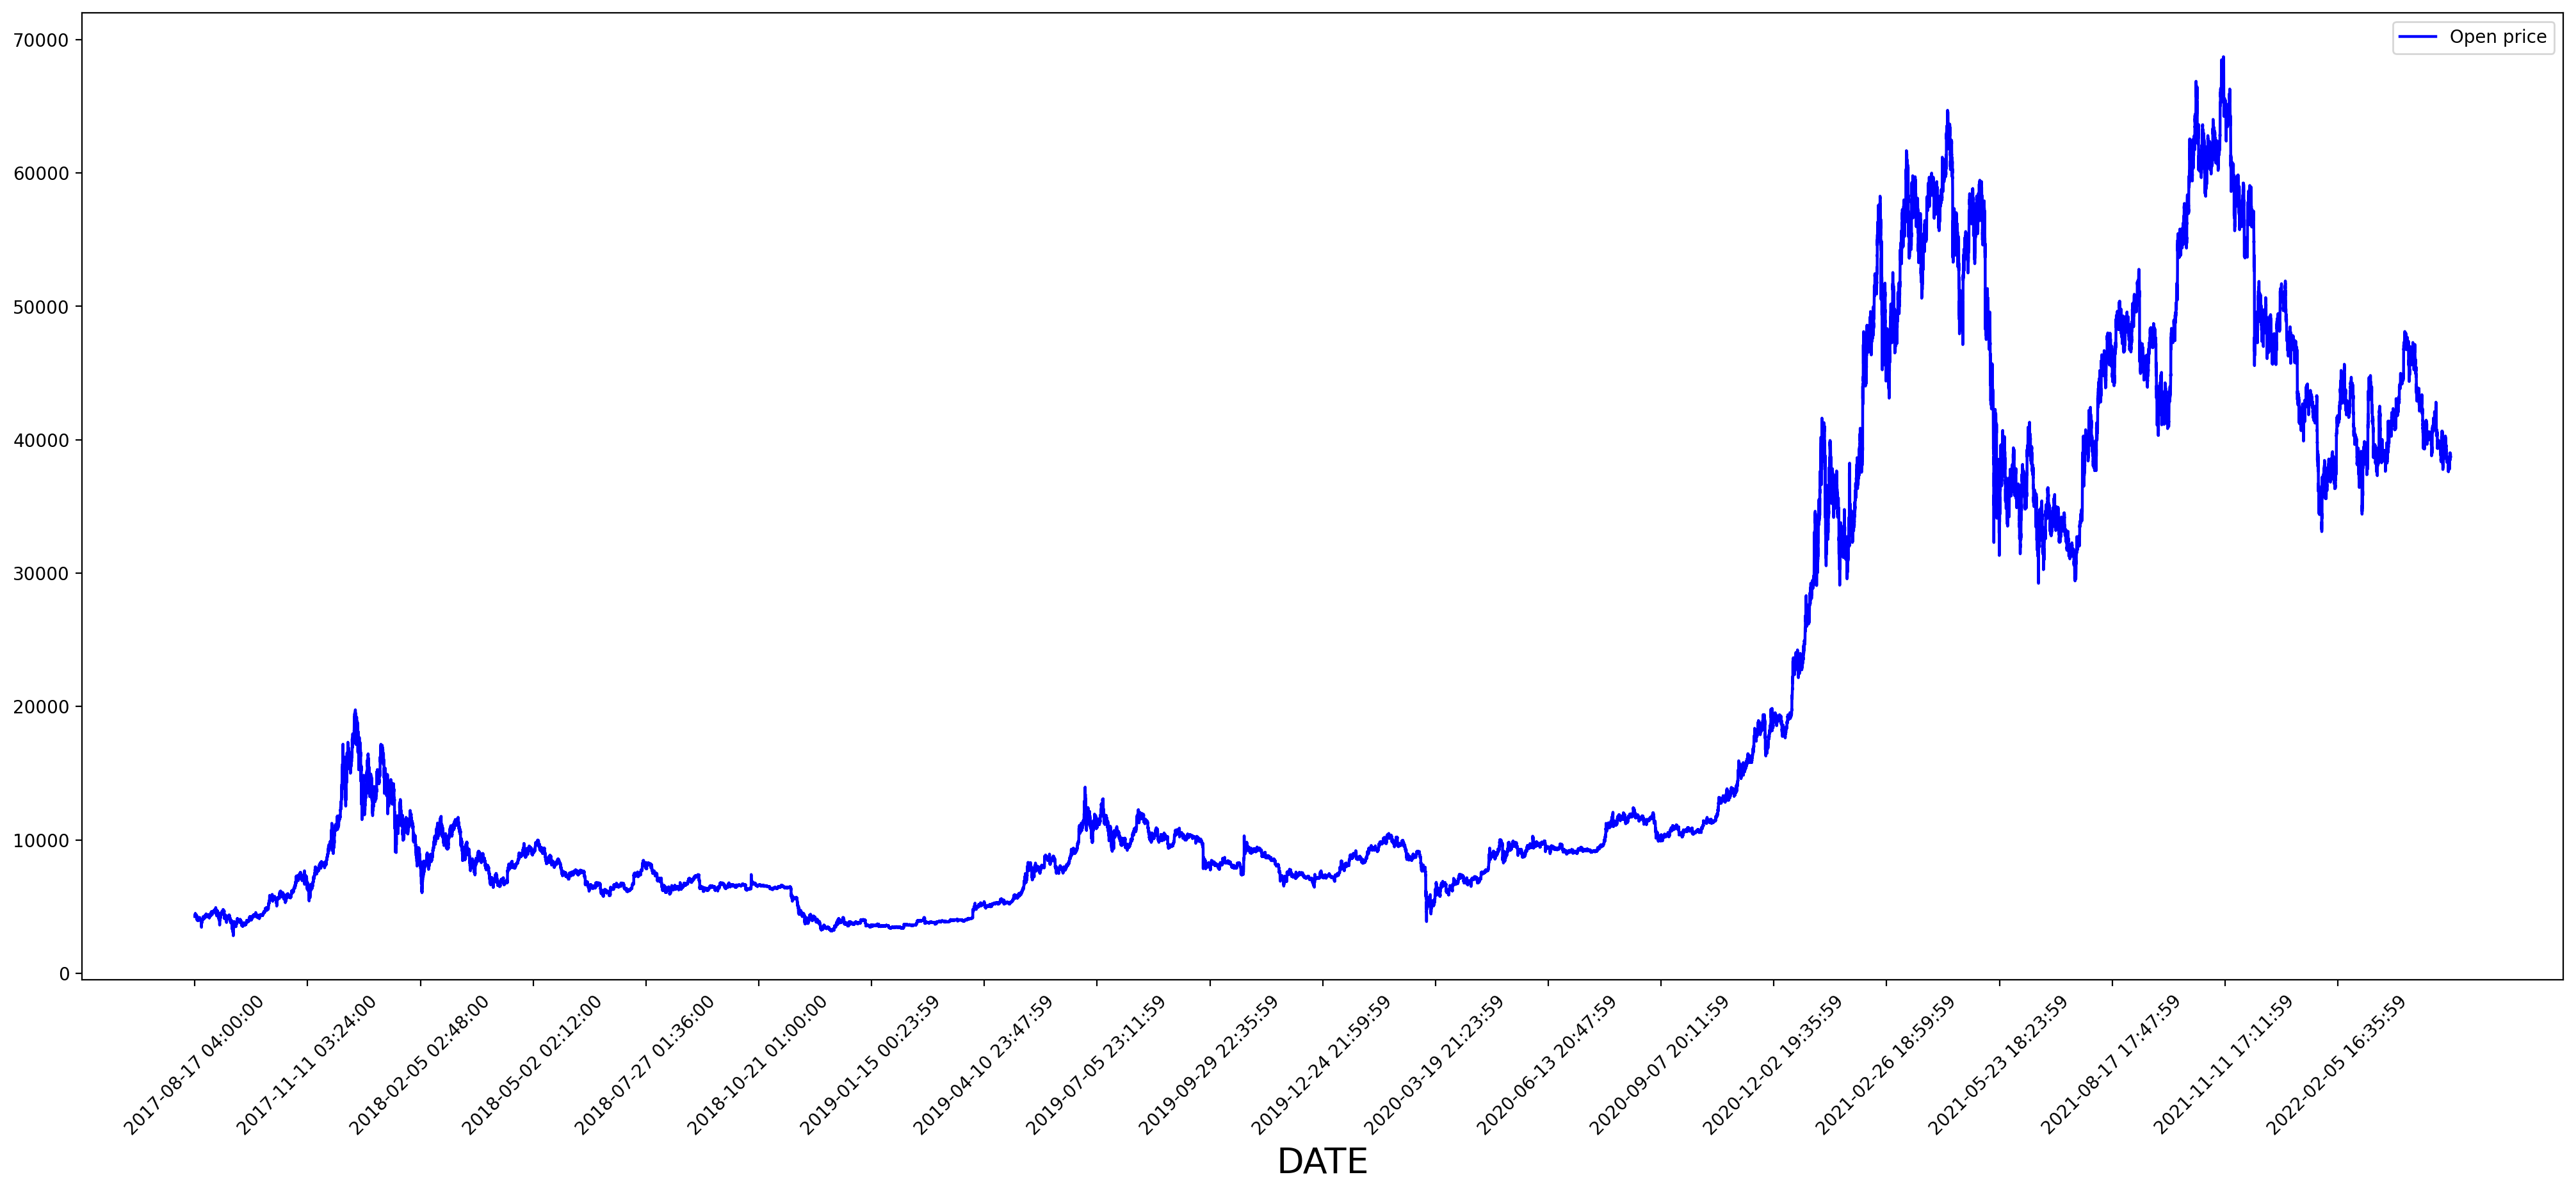

In [11]:
# data = data[:500]
fig_size = 200
fig = plt.figure(figsize=(25, 10), dpi=fig_size)

gs = gridspec.GridSpec(8, 1, wspace=0.00, hspace=0.00)  # 7x1 grid
ax = fig.add_subplot(gs[0:, 0])  # first row

data.plot(lw=1.6, x='o_date', y='Close', color='blue', kind='line', ax=ax, label='Open price')
g_time = data["o_date"].iloc[-1] - data["o_date"].iloc[0]
date_space = g_time / fig_size * 10
ax.xaxis.set_ticks(np.arange(data["o_date"].iloc[0], data["o_date"].iloc[-1], date_space))

ax.set_xlabel('DATE', fontsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
ax.tick_params(axis='x', labelrotation=45)

# Data merge

In [7]:
from app.data_mgt.datamgt import ohlcv_from_csv_to_df
file = 'data/ohlcv_ETHUSDT_1h_from_1557410400000_to_1652101200000.csv'
data_1 = ohlcv_from_csv_to_df(file)
data_1

,o_ts,Open,High,Low,Close,Volume,c_ts,o_date
0,2019-05-09 14:00:00,169.52,169.62,168.69,168.93,6193.73174,2019-05-09 14:59:59.999000064,18025.583333
1,2019-05-09 15:00:00,168.96,169.17,168.00,168.35,7669.91770,2019-05-09 15:59:59.999000064,18025.625000
2,2019-05-09 16:00:00,168.35,169.10,168.20,168.67,7629.61378,2019-05-09 16:59:59.999000064,18025.666667
3,2019-05-09 17:00:00,168.67,168.74,167.67,167.83,7406.57160,2019-05-09 17:59:59.999000064,18025.708333
4,2019-05-09 18:00:00,167.84,168.11,166.57,167.75,13740.83446,2019-05-09 18:59:59.999000064,18025.750000
...,...,...,...,...,...,...,...,...
26247,2022-05-09 09:00:00,2463.96,2469.72,2441.13,2445.66,30898.00540,2022-05-09 09:59:59.999000064,19121.375000
26248,2022-05-09 10:00:00,2445.66,2450.22,2362.41,2377.60,114394.54280,2022-05-09 10:59:59.999000064,19121.416667
26249,2022-05-09 11:00:00,2377.60,2411.00,2362.42,2406.03,62710.97980,2022-05-09 11:59:59.999000064,19121.458333
26250,2022-05-09 12:00:00,2406.04,2422.00,2390.83,2394.08,43610.15550,2022-05-09 12:59:59.999000064,19121.500000


In [28]:
file = 'data/ohlcv_ETHUSDT_1h_from_1652101200000_to_1652187600000.csv'
data_2 = ohlcv_from_csv_to_df(file)
data_2

,o_ts,Open,High,Low,Close,Volume,c_ts,o_date
0,2022-05-09 13:00:00,2394.08,2447.94,2385.00,2413.91,90381.9883,2022-05-09 13:59:59.999000064,19121.541667
1,2022-05-09 14:00:00,2413.90,2417.65,2370.68,2384.58,76409.8467,2022-05-09 14:59:59.999000064,19121.583333
2,2022-05-09 15:00:00,2384.59,2403.63,2345.00,2381.87,86003.2311,2022-05-09 15:59:59.999000064,19121.625000
3,2022-05-09 16:00:00,2381.87,2404.69,2321.03,2328.19,102280.7037,2022-05-09 16:59:59.999000064,19121.666667
4,2022-05-09 17:00:00,2328.19,2348.32,2250.00,2299.87,144556.2157,2022-05-09 17:59:59.999000064,19121.708333
5,2022-05-09 18:00:00,2299.87,2314.25,2244.63,2285.04,133270.9375,2022-05-09 18:59:59.999000064,19121.750000
6,2022-05-09 19:00:00,2285.05,2299.80,2225.00,2270.68,111639.9531,2022-05-09 19:59:59.999000064,19121.791667
7,2022-05-09 20:00:00,2270.68,2335.23,2263.66,2291.00,103793.0657,2022-05-09 20:59:59.999000064,19121.833333
8,2022-05-09 21:00:00,2290.99,2324.16,2272.96,2276.25,55415.9597,2022-05-09 21:59:59.999000064,19121.875000
9,2022-05-09 22:00:00,2276.45,2312.02,2263.68,2293.37,32453.2561,2022-05-09 22:59:59.999000064,19121.916667


In [33]:
data_1[:-1].merge(data_2, how='outer').tail(50)

,o_ts,Open,High,Low,Close,Volume,c_ts,o_date
26226,2022-05-08 12:00:00,2567.97,2579.03,2551.97,2556.36,22546.1445,2022-05-08 12:59:59.999000064,19120.500000
26227,2022-05-08 13:00:00,2556.35,2561.00,2520.01,2524.00,31430.2462,2022-05-08 13:59:59.999000064,19120.541667
26228,2022-05-08 14:00:00,2523.99,2543.68,2512.85,2525.68,45867.2301,2022-05-08 14:59:59.999000064,19120.583333
26229,2022-05-08 15:00:00,2525.69,2545.79,2515.63,2517.00,19263.7710,2022-05-08 15:59:59.999000064,19120.625000
26230,2022-05-08 16:00:00,2516.99,2536.41,2516.61,2521.40,17645.3908,2022-05-08 16:59:59.999000064,19120.666667
26231,2022-05-08 17:00:00,2521.40,2535.00,2484.00,2529.48,109260.6532,2022-05-08 17:59:59.999000064,19120.708333
26232,2022-05-08 18:00:00,2529.49,2571.78,2512.78,2562.08,38135.4982,2022-05-08 18:59:59.999000064,19120.750000
26233,2022-05-08 19:00:00,2562.08,2571.69,2558.84,2562.01,12866.8142,2022-05-08 19:59:59.999000064,19120.791667
26234,2022-05-08 20:00:00,2562.00,2564.69,2539.03,2540.64,18073.2449,2022-05-08 20:59:59.999000064,19120.833333
26235,2022-05-08 21:00:00,2540.65,2557.36,2540.64,2555.57,9915.1973,2022-05-08 21:59:59.999000064,19120.875000


In [36]:
file = 'data/ohlcv_ETHUSDT_1h_from_1557410400000_to_1652187600000.csv'
data_3 = ohlcv_from_csv_to_df(file)
data_3.tail(50)


,o_ts,Open,High,Low,Close,Volume,c_ts,o_date
26226,2022-05-08 12:00:00,2567.97,2579.03,2551.97,2556.36,22546.1445,2022-05-08 12:59:59.999000064,19120.500000
26227,2022-05-08 13:00:00,2556.35,2561.00,2520.01,2524.00,31430.2462,2022-05-08 13:59:59.999000064,19120.541667
26228,2022-05-08 14:00:00,2523.99,2543.68,2512.85,2525.68,45867.2301,2022-05-08 14:59:59.999000064,19120.583333
26229,2022-05-08 15:00:00,2525.69,2545.79,2515.63,2517.00,19263.7710,2022-05-08 15:59:59.999000064,19120.625000
26230,2022-05-08 16:00:00,2516.99,2536.41,2516.61,2521.40,17645.3908,2022-05-08 16:59:59.999000064,19120.666667
26231,2022-05-08 17:00:00,2521.40,2535.00,2484.00,2529.48,109260.6532,2022-05-08 17:59:59.999000064,19120.708333
26232,2022-05-08 18:00:00,2529.49,2571.78,2512.78,2562.08,38135.4982,2022-05-08 18:59:59.999000064,19120.750000
26233,2022-05-08 19:00:00,2562.08,2571.69,2558.84,2562.01,12866.8142,2022-05-08 19:59:59.999000064,19120.791667
26234,2022-05-08 20:00:00,2562.00,2564.69,2539.03,2540.64,18073.2449,2022-05-08 20:59:59.999000064,19120.833333
26235,2022-05-08 21:00:00,2540.65,2557.36,2540.64,2555.57,9915.1973,2022-05-08 21:59:59.999000064,19120.875000
